In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/chaozhang/Documents/ChaoLearning/Machine Learning Foundations for Product Managers/CCPP_data.csv')

## - Temperature (T) in the range 1.81°C to 37.11°C,
## - Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
## - Relative Humidity (RH) in the range 25.56% to 100.16%
## - Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
## - Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


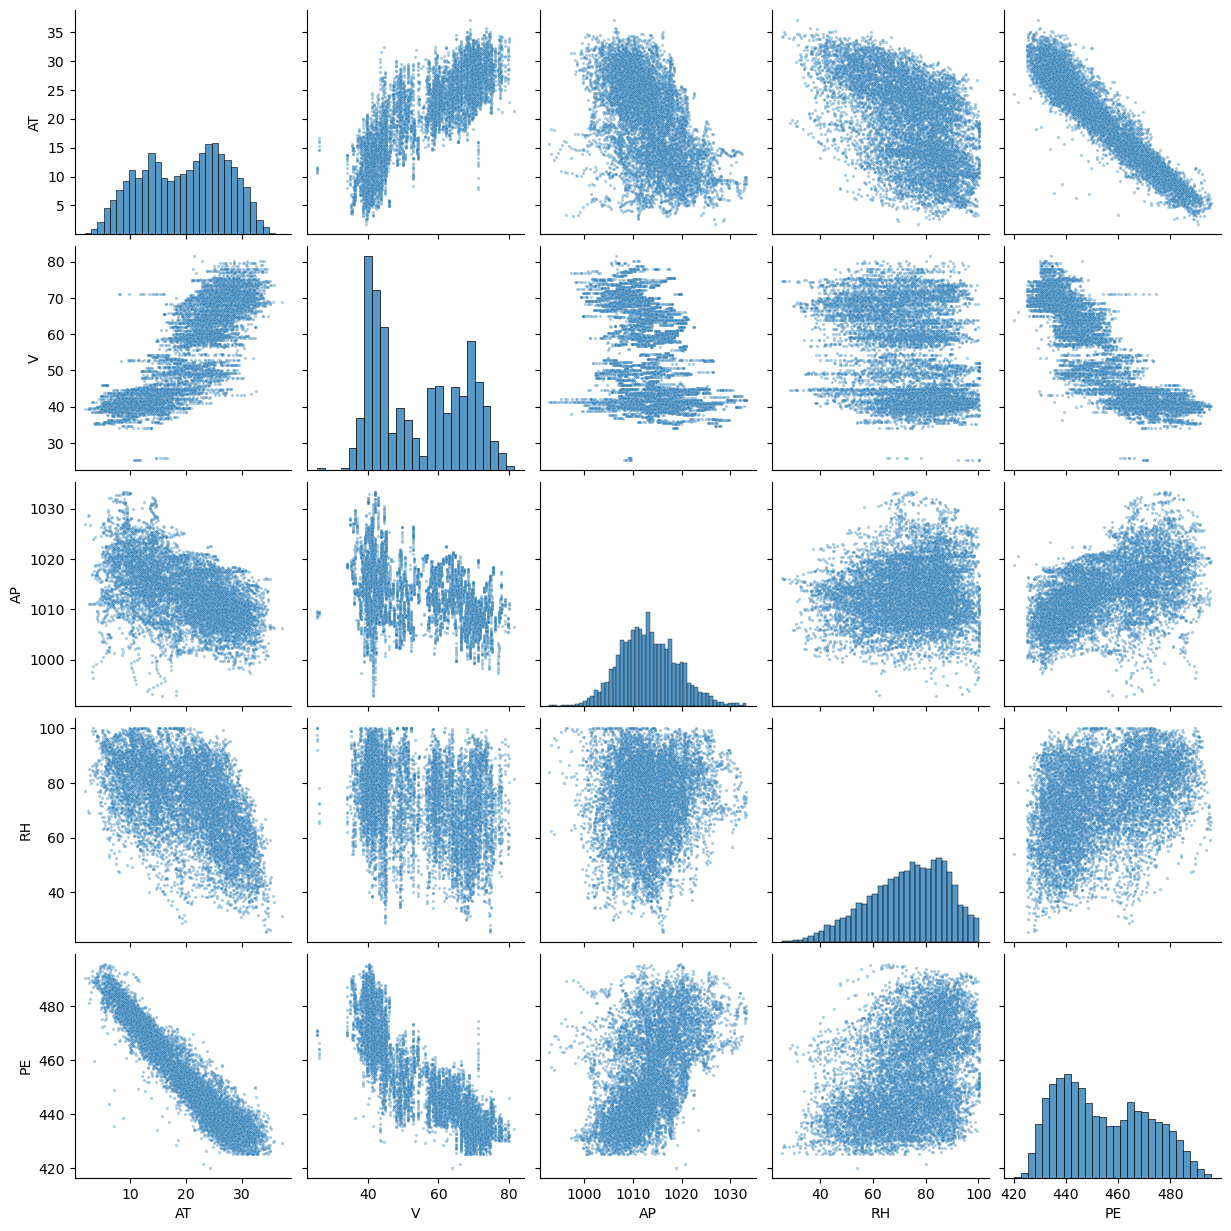

In [14]:
sns.pairplot(df,plot_kws={"s": 5,'alpha': 0.4})

In [158]:
from sklearn.model_selection import train_test_split
X = df[['AT','V','AP','RH']]
y = df['PE']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Linear Regression

In [138]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X,y)

LinearRegression()

In [139]:
lin_model.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [141]:
y_predict = pd.DataFrame(
    data = lin_model.predict(X),
    columns = ['PE predicted']
    )


RMSE training dataset  20.76739753253501


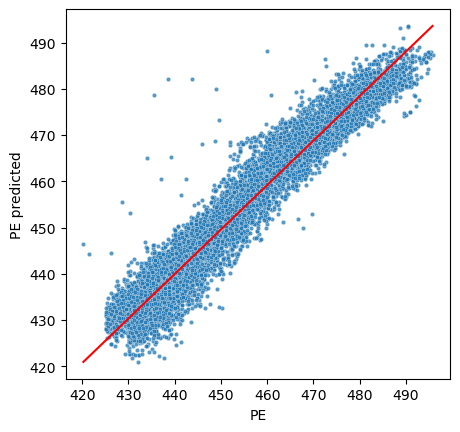

In [152]:
sns.scatterplot(
    x = y,
    y = y_predict['PE predicted'],
    s = 10,
    alpha = 0.75
)
plt.gca().set_aspect('equal', adjustable='box')
sns.lineplot(
    x=np.linspace(y.min(),y.max(), 100),
    y=np.linspace(y_predict['PE predicted'].min(), y_predict['PE predicted'].max(), 100),
    color='red', 
    #label='y = x'
    )

print('RMSE training dataset ',np.mean((y- y_predict['PE predicted'])**2))

In [108]:
lin_model.coef_

array([-1.97735604, -0.23404614,  0.0621215 , -0.15804003])

### Random Forest

In [162]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 4, random_state=10).fit(X,y)

In [163]:
y_predict = pd.DataFrame(
    data = rf_model.predict(X),
    columns = ['PE predicted']
    )


RMSE training dataset  3.0316576936141306


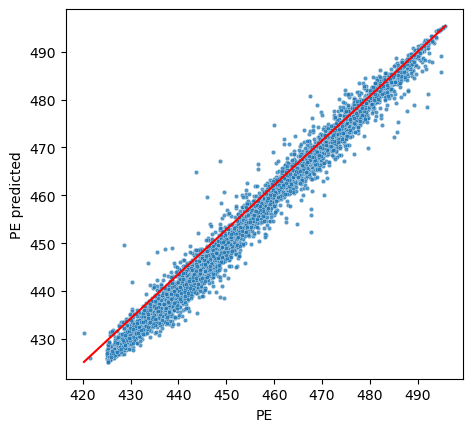

In [164]:
sns.scatterplot(
    x = y,
    y = y_predict['PE predicted'],
    s = 10,
    alpha = 0.75
)
plt.gca().set_aspect('equal', adjustable='box')
sns.lineplot(
    x=np.linspace(y.min(),y.max(), 100),
    y=np.linspace(y_predict['PE predicted'].min(), y_predict['PE predicted'].max(), 100),
    color='red', 
    #label='y = x'
    )

print('RMSE training dataset ',np.mean((y- y_predict['PE predicted'])**2))